## Plots for ZZZ_6l analysis

In [1]:


import uproot 
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.gridspec as gridspec
from matplotlib.ticker import MultipleLocator, FuncFormatter

import gc

from sklearn.metrics import roc_curve, auc, roc_auc_score
from matplotlib.lines import Line2D
     

from cycler import cycler
import matplotlib

# Set the color cycle
#plt.rc('axes', prop_cycle=cycler('color', ['#73b06f', '#e6701b', '#007090', '#c7463d', '#ffad08', '#6f73b0', '#56b4e9', '#4c6e3d', '#c47ca2', '#f5f575']))
# https://coolors.co/542344-f68e5f-e5e059-007ea7-98e2c6
plt.rc('axes', prop_cycle=cycler('color', ['#73b06f', '#e6701b', '#007090', '#e7298a', '#802392', '#ffad08', '#56b4e9']))

# Configure Matplotlib to use LaTeX fonts
#matplotlib.rcParams["text.usetex"] = True
matplotlib.rcParams["font.family"] = "serif"

# Set font sizes
matplotlib.rcParams.update(
    {
        "font.size": 16,  # General font size
    }
)
     
%load_ext autoreload
%autoreload 2



In [2]:
save_status = False # save all histograms!

In [8]:
path_signal = "../histmaker/ZZZ6l/wzp6_ee_llH_HZZ_llll_ecm240.root"
file_signal = uproot.open(path_signal)

In [41]:
path_signalMC = "../histmaker_MC/ZZZ6l/wzp6_ee_llH_HZZ_llll_ecm240.root"
file_signalMC = uproot.open(path_signalMC)

In [42]:
file_signalMC.keys()

['m_Z;1',
 'm_Z_onshell;1',
 'm_Z_offshell;1',
 'm_recoil_from_Z;1',
 'p_Z;1',
 'p_Z_onshell;1',
 'p_Z_offshell;1',
 'missing_momentum;1',
 'missing_momentum_emu_only;1',
 'eventsProcessed;1',
 'sumOfWeights;1',
 'intLumi;1',
 'crossSection;1',
 'kfactor;1',
 'matchingEfficiency;1']

Look at 
-  'm_Z;1',
-  'm_Z_onshell;1',
-  'm_Z_offshell;1',
-  'm_recoil_from_Z;1',
-  'p_Z;1',
-  'p_Z_onshell;1',
-  'p_Z_offshell;1',


In [9]:
file_signal.keys()

['muons_p_cut0;1',
 'muons_theta_cut0;1',
 'muons_phi_cut0;1',
 'muons_q_cut0;1',
 'muons_no_cut0;1',
 'muons_iso_cut0;1',
 'electrons_p_cut0;1',
 'electrons_theta_cut0;1',
 'electrons_phi_cut0;1',
 'electrons_q_cut0;1',
 'electrons_no_cut0;1',
 'electrons_iso_cut0;1',
 'cutFlow;1',
 'muons_p_cut2;1',
 'muons_q_cut2;1',
 'muons_no_cut2;1',
 'muons_iso_cut2;1',
 'electrons_p_cut2;1',
 'electrons_q_cut2;1',
 'electrons_no_cut2;1',
 'electrons_iso_cut2;1',
 'muons_p_cut3;1',
 'muons_q_cut3;1',
 'muons_no_cut3;1',
 'electrons_p_cut3;1',
 'electrons_q_cut3;1',
 'electrons_no_cut3;1',
 'higgs_mass;1',
 'recoil_mass;1',
 'm_Z_onshell_from_H;1',
 'm_Z_offshell_from_H;1',
 'm_Z_onshell;1',
 'p_Z_onshell_from_H;1',
 'p_Z_offshell_from_H;1',
 'p_Z_onshell;1',
 'higgs_mass_cut4;1',
 'recoil_mass_cut4;1',
 'm_Z_onshell_from_H_cut4;1',
 'm_Z_offshell_from_H_cut4;1',
 'm_Z_onshell_cut4;1',
 'p_Z_onshell_from_H_cut4;1',
 'p_Z_offshell_from_H_cut4;1',
 'p_Z_onshell_cut4;1',
 'eventsProcessed;1',
 'sumO

I want to look at: 
- 'higgs_mass;1',
- 'recoil_mass;1',
- 'm_Z_onshell_from_H;1',
- 'm_Z_offshell_from_H;1',
- 'm_Z_onshell;1',
- 'p_Z_onshell_from_H;1',
- 'p_Z_offshell_from_H;1',
- 'p_Z_onshell;1',

In [22]:
keys = [
 'higgs_mass;1',
 'recoil_mass;1',
 'm_Z_onshell_from_H;1',
 'm_Z_offshell_from_H;1',
 'm_Z_onshell;1',
 'p_Z_onshell_from_H;1',
 'p_Z_offshell_from_H;1',
 'p_Z_onshell;1',
]

In [35]:
def plot_hists(keys, nrows, ncols, figsize, save_status=False):
    fig, ax = plt.subplots(nrows, ncols, figsize=figsize, constrained_layout=True)

    axs = ax.flatten()

    for i, key in enumerate(keys):
        d = file_signal[key]
        hist, edges = d.to_numpy()
        bin_centers = (edges[:-1] + edges[1:]) / 2  
        axs[i].hist(bin_centers, bins=edges, weights=hist, histtype="step", linewidth=2)
        axs[i].set_xlabel(key)
        axs[i].grid(True)
    plt.show()

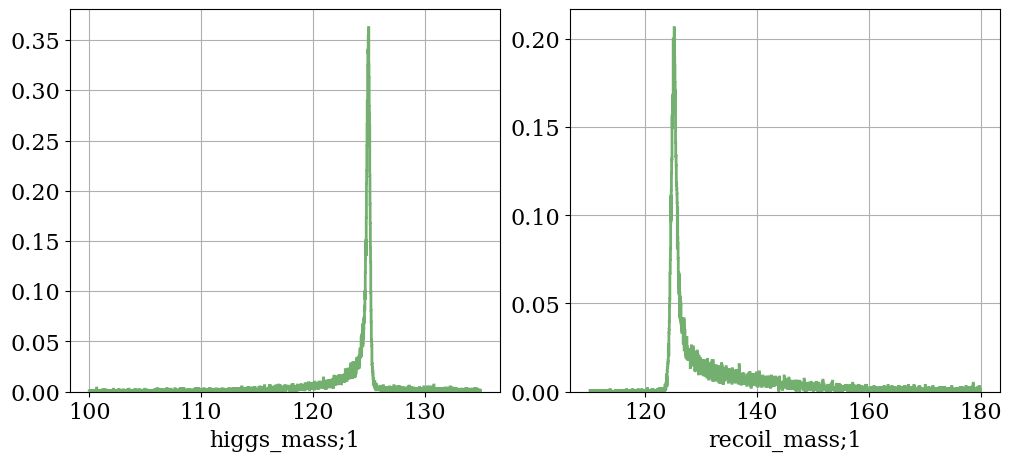

In [36]:
keys = [
 'higgs_mass;1',
 'recoil_mass;1',
]

plot_hists(keys, 1, 2, (10, 4.5))

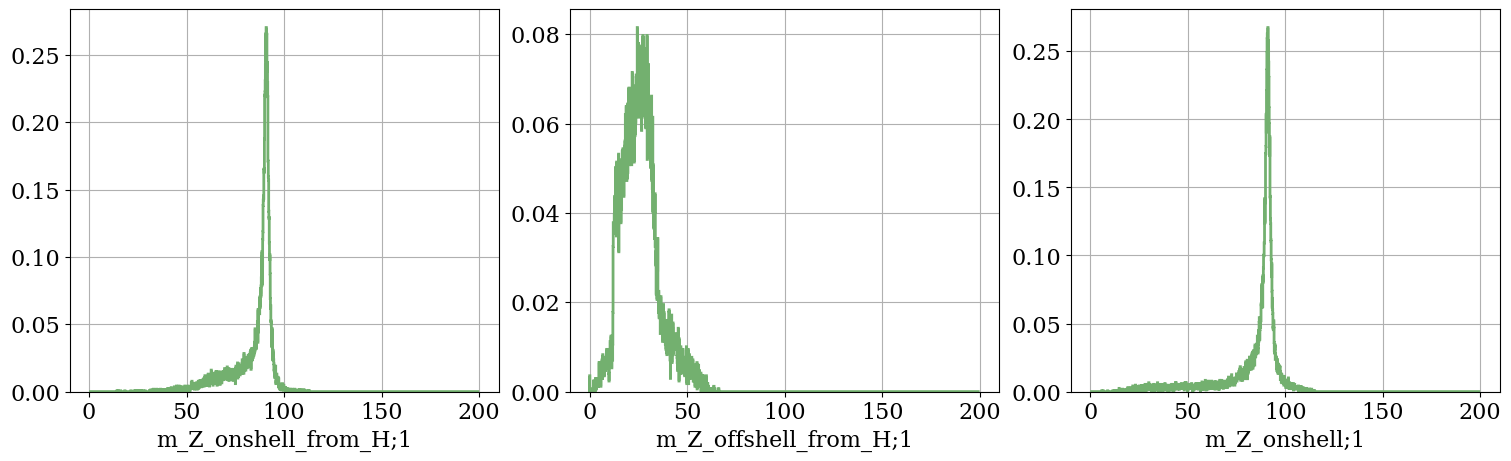

In [39]:
keys = [
 'm_Z_onshell_from_H;1',
 'm_Z_offshell_from_H;1',
 'm_Z_onshell;1',
]

plot_hists(keys, 1, 3, (15, 4.5))

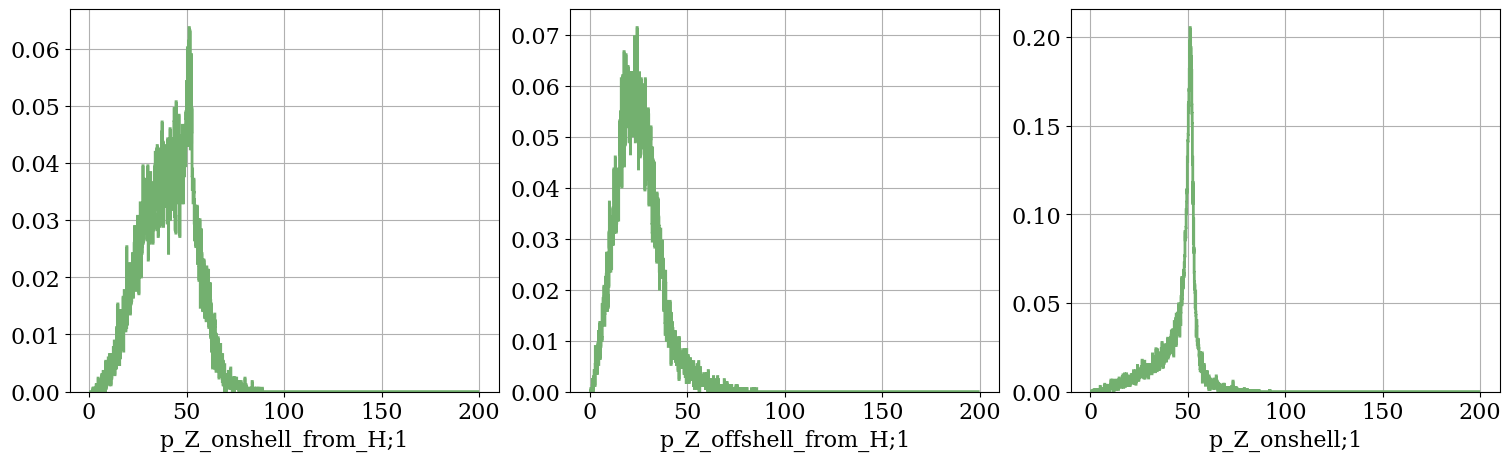

In [40]:
keys = [
 'p_Z_onshell_from_H;1',
 'p_Z_offshell_from_H;1',
 'p_Z_onshell;1',
]

plot_hists(keys, 1, 3, (15, 4.5))

## Plot with MC data

In [44]:
keys = [
 'm_Z;1',
 'm_Z_onshell;1',
 'm_Z_offshell;1',
 'm_recoil_from_Z;1',
 'p_Z;1',
 'p_Z_onshell;1',
 'p_Z_offshell;1', 
]

In [54]:
def plot_Z_p():
    k_reco = [
        'p_Z_onshell_from_H;1',
        'p_Z_offshell_from_H;1',
        'p_Z_onshell;1',
    ]
    k_gen = [
        'p_Z_onshell;1',
        'p_Z_offshell;1',
        'p_Z;1',
    ]

    xlimits = [
        (0, 100),
        (0, 100),
        (0, 100),
    ]

    fig, ax = plt.subplots(1, 3, figsize=(15, 5), constrained_layout=True)

    axs = ax.flatten()

    for i in range(3):
        d = file_signal[k_reco[i]]
        hist, edges = d.to_numpy()
        bin_centers = (edges[:-1] + edges[1:]) / 2  
        axs[i].hist(bin_centers, bins=edges, weights=hist, histtype="step", linewidth=2, label="reco", density=True)

        d = file_signalMC[k_gen[i]]
        hist, edges = d.to_numpy()
        bin_centers = (edges[:-1] + edges[1:]) / 2  
        axs[i].hist(bin_centers, bins=edges, weights=hist, histtype="step", linewidth=2, label="MC", density=True)

        axs[i].set_xlabel(k_reco[i])
        axs[i].grid(True)

        axs[i].set_xlim(xlimits[i])

        axs[i].legend()
    plt.show()

    

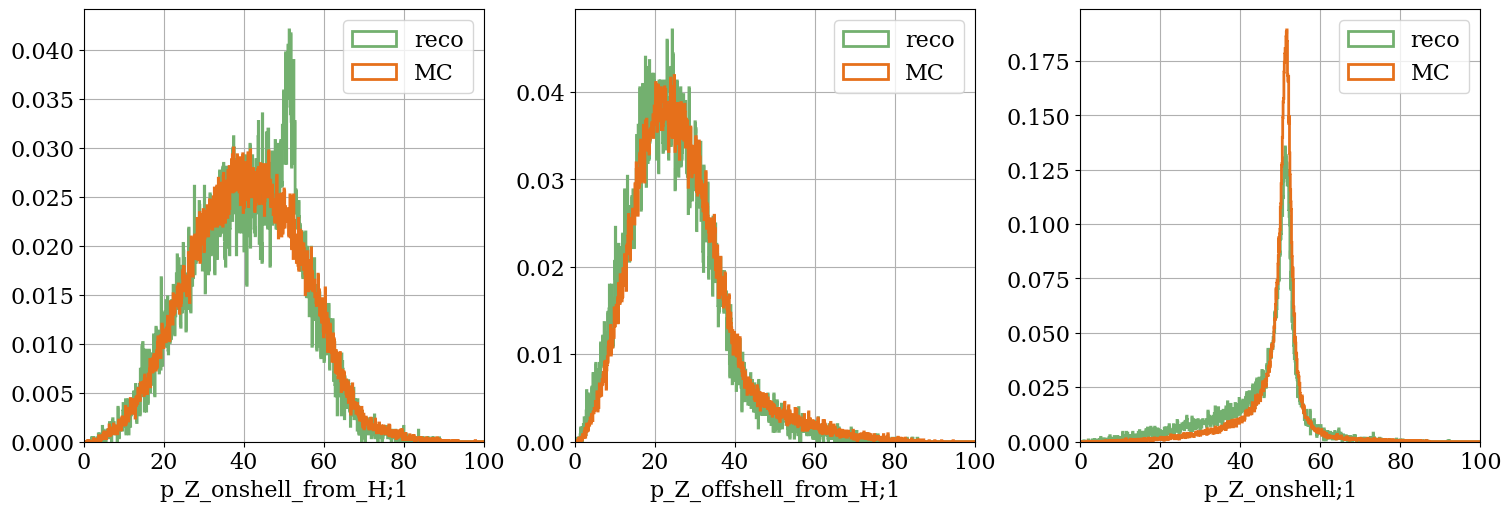

In [55]:
plot_Z_p()


In [62]:
def plot_Z_m():
    k_reco = [
        'm_Z_onshell_from_H;1',
        'm_Z_offshell_from_H;1',
        'm_Z_onshell;1',
    ]
    k_gen = [
        'm_Z_onshell;1',
        'm_Z_offshell;1',
        'm_Z;1',
    ]

    xlimits = [
        (0, 130),
        (0, 100),
        (0, 130),
    ]

    fig, ax = plt.subplots(1, 3, figsize=(15, 5), constrained_layout=True)

    axs = ax.flatten()

    for i in range(3):
        d = file_signal[k_reco[i]]
        hist, edges = d.to_numpy()
        bin_centers = (edges[:-1] + edges[1:]) / 2  
        axs[i].hist(bin_centers, bins=edges, weights=hist, histtype="step", linewidth=2, label="reco", density=True)

        d = file_signalMC[k_gen[i]]
        hist, edges = d.to_numpy()
        bin_centers = (edges[:-1] + edges[1:]) / 2  
        axs[i].hist(bin_centers, bins=edges, weights=hist, histtype="step", linewidth=2, label="MC", density=True)

        axs[i].set_xlabel(k_reco[i])
        axs[i].grid(True)

        axs[i].set_xlim(xlimits[i])

        axs[i].legend()
    plt.show()

    

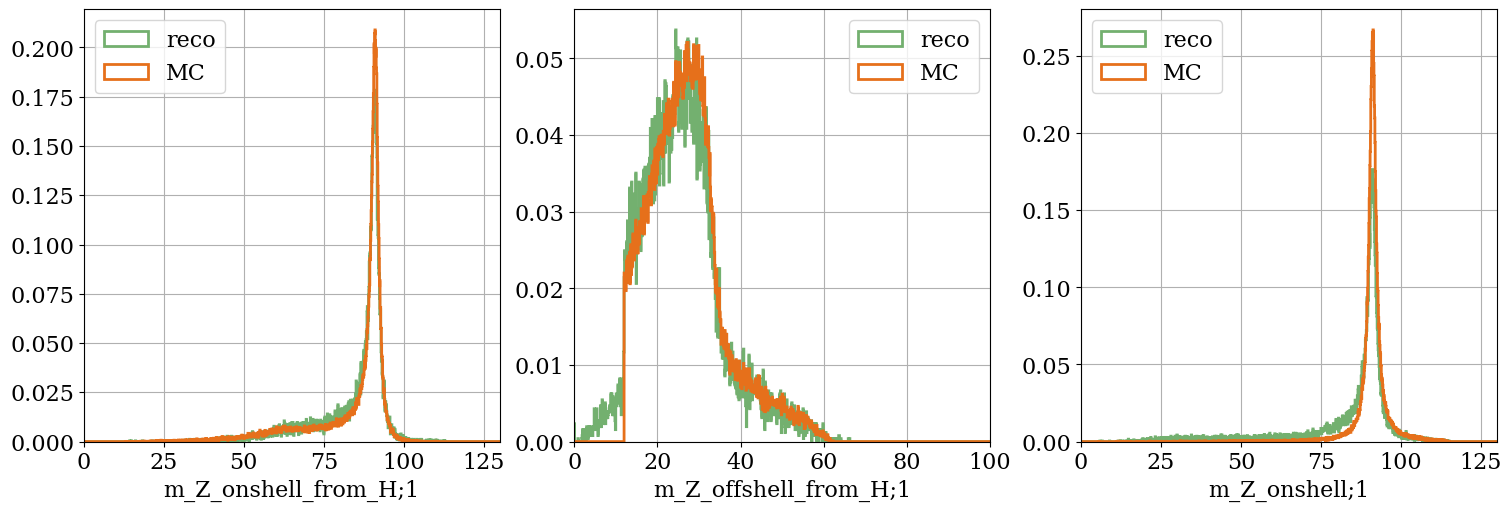

In [63]:
plot_Z_m()